**CONSTANT HEIGHT STM IMAGES**
------------------------------


Theory Background
-----------------

Prediction of STM images requires a knowledge of the **electronic structure** of the molecule and a theory of how STM works.

The standard theory of how STM works is based on the Tersoff-Hammann aproximation (https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.50.1998):
**the tunneling current is proportional to the local density of states (LDOS)**:

$$
I(\vec{r}, V) \propto \int_0^V LDOS(\vec{r}, E_f - V + \epsilon) \,d\epsilon\
$$
The LDOS at a certain energy is calculated from the electron density, computed as $\psi(\vec{r}) \psi^*(\vec{r})$, considering only  wavefunctions at that energy.

The value of the tip bias V determines **which states are explored**:  

$V = V_{tip} - V_{sample} > 0$ : sample electrons go to the tip, so the images **show occupied states**.

$V = V_{tip} - V_{sample} < 0$ : tip electrons go to the sample, so the images **show unoccupied states**.

In summary, to compute constant height STM images, we need:

1.- Obtain atomic coordinates (for example, from a previous geometry optimization calculation)

2.- Compute the eigenstates (wavefunction coefficients) and eigenvalues (energies). We will use **SIESTA** for this.

3.- Compute electron density of selected states and compute the STM current $I(\vec{r}, V)$ for any point in space $\vec{r}$ (at a constant height $z$), given the voltage bias $V$. We will use **python** for this.

$$
I(\vec{r}, V) \propto \int_0^V \sum_{i} \left[n(-V + E, \epsilon_i) *  \psi_i(\vec{r}) \psi_i^*(\vec{r})\right] \,dE\
$$

Python implementation of STM simulation
---------------------------------------
We first import of required libraries

In [3]:
import sisl
from sisl import *
import sisl.viz
import numpy as np
import matplotlib.pyplot as plt

**Check Structure and perform SIESTA calculation**

You need atomic coordinates to start (from a previous geometry optimization, for example), centered in the simulation cell. 
Once you have your molecule structure, you will need the Hamiltonian.

If you do not have it you can just run a single calculation from the fdf of the structure telling siesta to store the Hamiltonian using `SaveHS true  `.


In [9]:
benzene=Geometry.read("optimization.xyz")

In [8]:
print(benzene)

Geometry{na: 8, no: 8,
 Atoms{species: 1,
  Atom{Si, Z: 14, mass(au): 28.08550, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 8,
 },
 maxR: -1.00000,
 Lattice{nsc: [1 1 1],
  origin=[0.0000, 0.0000, 0.0000],
  A=[14.0920, 0.0000, 0.0000],
  B=[0.0000, 14.0920, 0.0000],
  C=[0.0000, 0.0000, 14.0920],
  bc=[Unknown,
      Unknown,
      Unknown]
 }
}


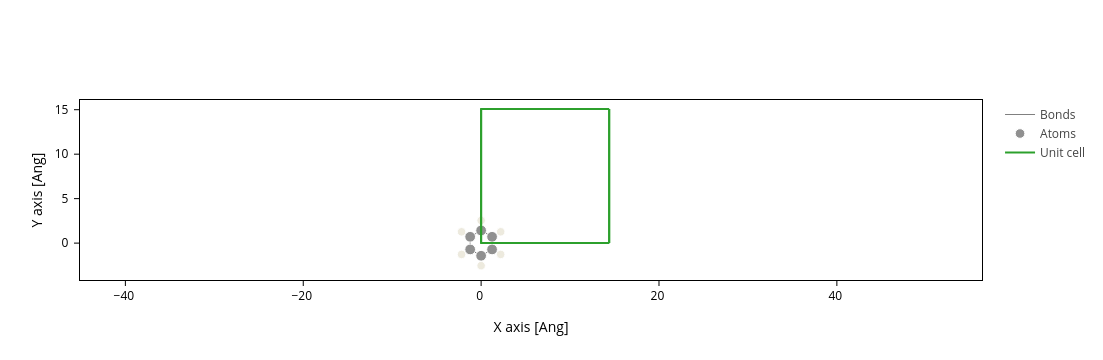

In [18]:
benzene.plot(axes="xy")

In [19]:
ben_centered=benzene.move((7,7,5))

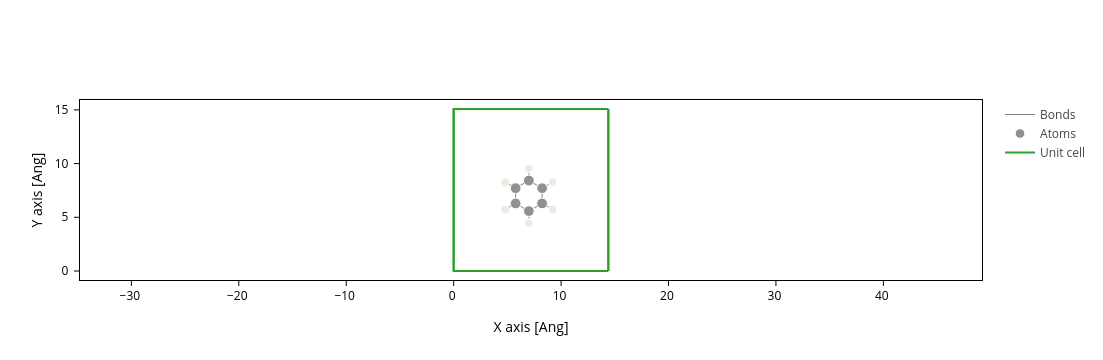

In [22]:
ben_centered.plot(axes="xy")

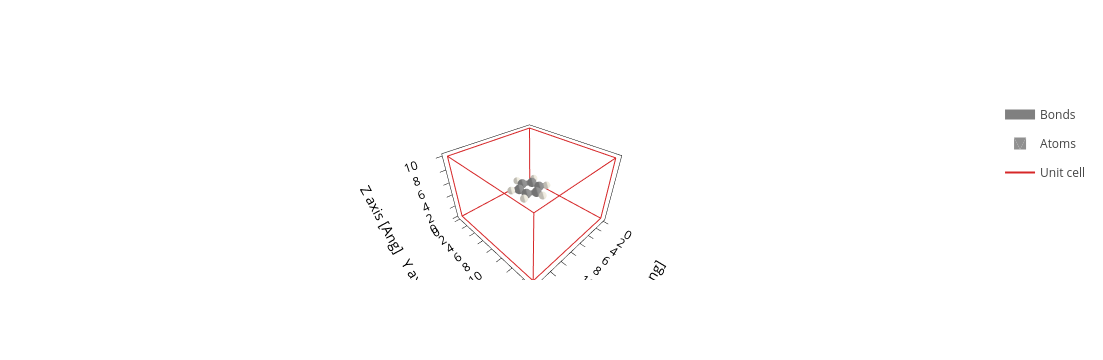

In [21]:
ben_centered.plot()

In [23]:
ben_centered.write("structure.fdf")

## Analysis of SIESTA Results
**Load SIESTA Calculation**

Once the SIESTA run has finished, to load SIESTA results into python you can do:

```python
sisl.get_sile("run/stm.fdf").read_hamiltonian()
```

as we have done in previous lab sessions.

In [26]:
fdf = get_sile("RUN/stm.fdf")

In [27]:
H = fdf.read_hamiltonian()

In [29]:
print(H)

Hamiltonian{non-zero: 11646, orthogonal: False,
 Spin{unpolarized, kind=f},
 Geometry{na: 12, no: 108,
  Atoms{species: 2,
   Atom{C, Z: 6, mass(au): 12.01100, maxR: 4.00313,
    AtomicOrbital{2sZ1, q0: 2.0, SphericalOrbital{l: 0, R: 3.10400910650152, q0: 2.0}},
    AtomicOrbital{2sZ2, q0: 0.0, SphericalOrbital{l: 0, R: 1.7478297099283084, q0: 0.0}},
    AtomicOrbital{2pyZ1, q0: 0.6666666666666666, SphericalOrbital{l: 1, R: 4.0031312515807995, q0: 2.0}},
    AtomicOrbital{2pzZ1, q0: 0.6666666666666666, SphericalOrbital{l: 1, R: 4.0031312515807995, q0: 2.0}},
    AtomicOrbital{2pxZ1, q0: 0.6666666666666666, SphericalOrbital{l: 1, R: 4.0031312515807995, q0: 2.0}},
    AtomicOrbital{2pyZ2, q0: 0.0, SphericalOrbital{l: 1, R: 2.2502673795591357, q0: 0.0}},
    AtomicOrbital{2pzZ2, q0: 0.0, SphericalOrbital{l: 1, R: 2.2502673795591357, q0: 0.0}},
    AtomicOrbital{2pxZ2, q0: 0.0, SphericalOrbital{l: 1, R: 2.2502673795591357, q0: 0.0}},
    AtomicOrbital{3dxyZ1P, q0: 0.0, SphericalOrbital{l: 

In [40]:
molec=H.geometry

## Eigenstates

Once you have a hamiltonian, you can get all Eigenstates with `H.eigenstate()`. Then you can loop this object to get each individual eigenstate. 
- Each eigenstate has its energy stored under the `.eig` property.
- We can find the HOMO and LUMO.
- We can use the `.dos`  method to obtain the density of states DOS(E).
- In sisl we can plot pdos directly in a given Energy range with something like `H.plot.pdos(data_Erange=[-10,10],nE=1200,Erange=[-10,10]) `

In [31]:
es=H.eigenstate()

In [32]:
print(es)

EigenstateElectron{states: 108, kind: f,
 Hamiltonian{non-zero: 11646, orthogonal: False,
  Spin{unpolarized, kind=f},
  Geometry{na: 12, no: 108,
   Atoms{species: 2,
    Atom{C, Z: 6, mass(au): 12.01100, maxR: 4.00313,
     AtomicOrbital{2sZ1, q0: 2.0, SphericalOrbital{l: 0, R: 3.10400910650152, q0: 2.0}},
     AtomicOrbital{2sZ2, q0: 0.0, SphericalOrbital{l: 0, R: 1.7478297099283084, q0: 0.0}},
     AtomicOrbital{2pyZ1, q0: 0.6666666666666666, SphericalOrbital{l: 1, R: 4.0031312515807995, q0: 2.0}},
     AtomicOrbital{2pzZ1, q0: 0.6666666666666666, SphericalOrbital{l: 1, R: 4.0031312515807995, q0: 2.0}},
     AtomicOrbital{2pxZ1, q0: 0.6666666666666666, SphericalOrbital{l: 1, R: 4.0031312515807995, q0: 2.0}},
     AtomicOrbital{2pyZ2, q0: 0.0, SphericalOrbital{l: 1, R: 2.2502673795591357, q0: 0.0}},
     AtomicOrbital{2pzZ2, q0: 0.0, SphericalOrbital{l: 1, R: 2.2502673795591357, q0: 0.0}},
     AtomicOrbital{2pxZ2, q0: 0.0, SphericalOrbital{l: 1, R: 2.2502673795591357, q0: 0.0}},
  

In [33]:
len(es)

108

In [35]:
idx_lumo = (es.eig > 0).nonzero()[0][0] #trick to obtain the LUMO as first positive eigenvalue

In [36]:
print(idx_lumo)

15


In [37]:
print("HOMO E=",es.eig[idx_lumo-1]," eV")
print("LUMO E=",es.eig[idx_lumo]," eV")

HOMO E= -1.644710708154887  eV
LUMO E= 3.2723384944940688  eV


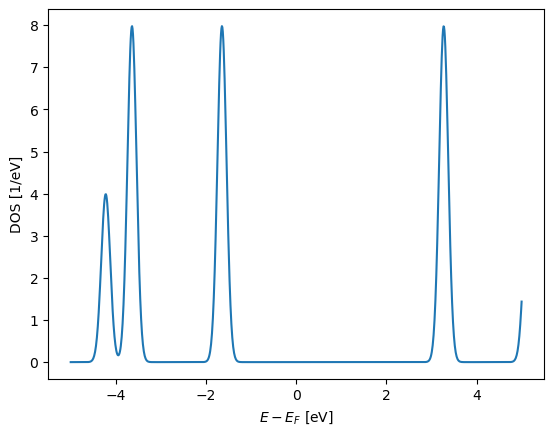

In [38]:
E = np.linspace(-5, 5, 1000)
plt.plot(E, es.DOS(E))
plt.xlabel(r"$E - E_F$ [eV]")
plt.ylabel(r"DOS [1/eV]");

-----------------------------------------------------------------------------------
## Plotting Local Density of States

Create a grid and fill the grid with LDOS

**To compute wavefunctions on the grid:**

To compute $\psi (\vec{r})$ you need three things.

1. **The eigenstate coefficients.** Once you have a hamiltonian, you can get all of them with `H.eigenstate()`. Then you can loop this object to get each individual eigenstate. Each eigenstate has its energy stored under the `.eig` property.
2. **A grid of points in space.** You can create one with `sisl.Grid(geometry, shape=(100, 100, 100))`. This will create a grid of $100x100x100$ points within the cell of your geometry.
3. **A function to project the wavefunction into the grid.** The eigenstate object has a `wavefunction` method ([docs](https://zerothi.github.io/sisl/api/generated/sisl.physics.electron.EigenstateElectron.html#sisl.physics.electron.EigenstateElectron.wavefunction)) that will project the wavefunction into an already initialized grid.

Remember that we have done this already on the first SIESTA lab, with a water molecule.

Once you have the wavefunction, you can also calculate the electron density $\psi_i(\vec{r}) \psi_i^*(\vec{r})$.


In [41]:
grid1=Grid((100,100,100),geometry=molec)
grid1.plot(axes="xy")

Try how a particular state looks like. For example:

In [ ]:
grid1.fill(0)
es[14].wavefunction(grid1)
grid1.plot(axes="xy")

Calculate electron density for a particular state

In [ ]:
grid2=grid1*grid1.grid.conj()
grid2.plot(axes="xy")

Calculate local electron density adding all states in a certain range

In [ ]:
G=sisl.Grid((100,100,100), geometry = molec)
G_t=sisl.Grid((100,100,100), geometry=molec)

In [ ]:
for n in range(idx_lumo-4,idx_lumo):
    print("adding state",n)
    G_t.fill(0)
    es[n].wavefunction(G_t)
    G = G+ G_t*G_t.grid.conj()
print("Plotting...")
G.plot(axes="xy")
    

# STM images #

**Remember**: The value of the tip bias V determines **which states are explored**:  

$V = V_{tip} - V_{sample} > 0$ : sample electrons go to the tip, so the images **show occupied states**.

$V = V_{tip} - V_{sample} < 0$ : tip electrons go to the sample, so the images **show unoccupied states**.

Now we can create a function `STM_grid(H, V)` that creates a grid adding all the states that contribute to the electron density $\psi_i(\vec{r}) \psi_i^*(\vec{r})$ relevant to the STM image.

The `STM_grid(H, V)` function need the Hamitonian (the object `H`) and the value of the voltage `V`.

In [ ]:
def STM_grid(H, V):
    gridT = sisl.Grid((100, 100, 100), geometry=molec)
    grid = sisl.Grid((100, 100, 100), geometry=molec)
    gridT.fill(0)
    E=-V
    for i in range(0,len(es)):
        #Negative V: electrons go from tip to sample filling unoccupied states from 0 to E
        if 0<es[i].eig<E:    
            grid.fill(0)
            es[i].wavefunction(grid)
            GT=grid*grid.grid.conj()
            gridT=gridT+GT
        #Positive V: electrons with energies between E and 0 leave the sample and go to the tip
        if E<es[i].eig<0:    
            grid.fill(0)
            es[i].wavefunction(grid)
            GT=grid*grid.grid.conj()
            gridT=gridT+GT 
    result=gridT
    return result

In [ ]:
V=STM_grid(H, 5)

In [ ]:
V.plot(axes="x,y")

Plots can be made incluing different heights

In [ ]:
z=7
V.plot(axes='x,y', z_range=[z- 0.1, z + 0.1])

**To plot the STM images at a certain height:**

A function is provided to plot molecules at multiple heights. You can use it as it is or modify it as you wish.

*Note*: If you have time, you can modify this function to create a plots at multiple voltages. Even a grid of plots at multiple voltages and multiple heights!

In [ ]:
# The helper function
def plot_STM_images(
    LDOS_grid: sisl.Grid, 
    min_height: int = 0, 
    max_height: int = 2,
    steps: int = 9,
    crange = None,
    colorscale: str = None
):
    """Plots constant height STM images at multiple heights

    Parameters
    ----------
    LDOS_grid:
        A grid containing the LDOS corresponding to the voltage that you
        want to plot, for ALL SPACE.
    min_height:
        The height of the first image.
    max_height:
        The height of the last image.
    steps:
        The number of steps between the first and the last image.
    log:
        Whether to plot the log of the values.
    crange:
        The range of the colorscale. E.g. [0, 2]. If None, it is computed
        from the minimum and maximum values of the data.
    colorscale:
        The plotly colorscale to use.

    Examples
    ----------

    This function should be used like:
    >>> grid = ...compute the LDOS in the grid.
    >>> plot_STM_images(grid)
    """

    # Determine all the heights that the user wants to plot
    heights = np.linspace(min_height, max_height, steps)
    # Get the position of the benzene molecule
    z_0 = V.geometry.xyz[:, 2].max()
    
    # Initialize a list of plots
    plots = []
    coloraxes = []
    # Loop through the heights, and for each of them we will create a plot.
    for height in heights:
        # Get the z for which we want the LDOS (benzene position + height)
        z = z_0 + height
        
        # Get the plot for this height
        plot = LDOS_grid.plot(axes='x,y', z_range=[z - 0.1, z + 0.1], crange=crange, colorscale=colorscale)

        # And append it to the list
        plots.append(plot)

    # Merge all the plots, with some extra arguments to beautify the plot.
    return sisl.viz.merge_plots(
        *plots, 
        composite_method="subplots", 
        arrange="square", 
        subplot_titles=[f"Height = {height} Ang" for height in heights],
        horizontal_spacing=0,
        vertical_spacing=0.05
    ).update_xaxes(
        visible=False
    ).update_yaxes(
        visible=False
    ).update_layout(
        height=900, title=f"Constant height STM images",
    )

In [ ]:
V=STM_grid(H, 5)
plot_STM_images(V)

In [ ]:
V=STM_grid(H, -5)
plot_STM_images(V)